In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
newData = pd.DataFrame()
df = []
counter = -1
filenames = os.listdir("data/")
for filename in filenames:
    xl = pd.ExcelFile("data/" + filename)
    for sheetname in xl.sheet_names:
        counter += 1
        df.append(pd.DataFrame())
        df[counter] = pd.read_excel("data/" + filename, sheet_name=sheetname)
        df[counter].fillna(1, inplace=True)
        df[counter].drop(columns=["Unnamed: 1", "Unnamed: 2", "Unnamed: 5", "Unnamed: 8"], index=[0,1,2,3], inplace=True)
        if (counter == 0):
            df[counter].drop(index=[4], inplace=True)
        df[counter].rename(columns={"Unnamed: 0":"age_group","Unnamed: 3":"p_active_emp", "Unnamed: 4":"p_active_unemp", "Unnamed: 6":"p_inactive_edu", "Unnamed: 7":"p_inactive_homemaker", "Unnamed: 9":"p_inactive_incomeNojob", "Unnamed: 10":"p_inactive_other", "Unnamed: 11":"p_not_stated"}, inplace=True)
        df[counter].set_index(np.arange(0, df[counter].shape[0]), inplace=True)
        df[counter].loc[0:12, "gender"] = "مرد و زن"
        df[counter].loc[13:25, "gender"] = "مرد"
        df[counter].loc[26:38, "gender"] = "زن"
        df[counter].drop(index=[0,13,26], inplace=True)
        df[counter].set_index(np.arange(0, df[counter].shape[0]), inplace=True)
        if (int(filename[17:-5]) % 2 == 1):
            df[counter].loc[0:df[counter].shape[0], "settlement"] = "شهری"
        else:
            df[counter].loc[0:df[counter].shape[0], "settlement"] = "روستایی"
        df[counter]["county_id"] = int(sheetname[-4:])
        df[counter]["county_name"] = sheetname[0:-4]
        df[counter]["total"] = df[counter]["p_active_emp"]+df[counter]["p_active_unemp"]+df[counter]["p_inactive_edu"]+df[counter]["p_inactive_homemaker"]+df[counter]["p_inactive_incomeNojob"]+df[counter]["p_inactive_other"]+df[counter]["p_not_stated"]
newData = pd.concat(df)
newData.set_index(np.arange(0, newData.shape[0]), inplace=True)


In [3]:
newData.to_excel("new.xlsx")

In [4]:
newData.to_csv("new.csv")

In [5]:
newData["emp_ratio"] = newData["p_active_emp"] / newData["total"]

In [6]:
filtmale = (newData["gender"] == "مرد")
filtfemale = (newData["gender"] == "زن")
filtcity = (newData["settlement"] == "شهری")
filtvill = (newData["settlement"] == "روستایی")
filtage1 = (newData["age_group"] == "10-14 ساله")
filtage2 = (newData["age_group"] == "15-19 ساله")
filtage3 = (newData["age_group"] == "20-24 ساله")
filtage4 = (newData["age_group"] == "25-29 ساله")
filtage5 = (newData["age_group"] == "30-34 ساله")
filtage6 = (newData["age_group"] == "35-39 ساله")
filtage7 = (newData["age_group"] == "40-44 ساله")
filtage8 = (newData["age_group"] == "45-49 ساله")
filtage9 = (newData["age_group"] == "50-54 ساله")
filtage10 = (newData["age_group"] == "55-59 ساله")
filtage11 = (newData["age_group"] == "60-64 ساله")
filtage12 = (newData["age_group"] == "65 ساله و بيشتر")


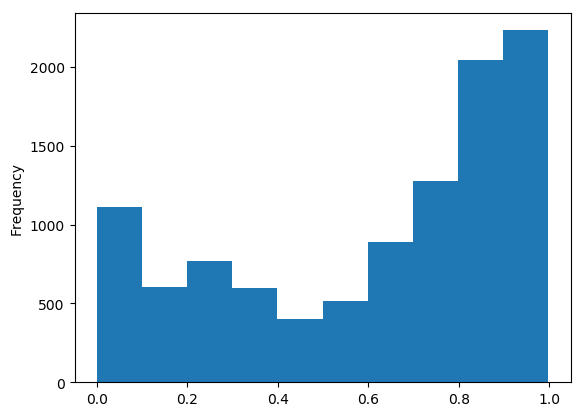

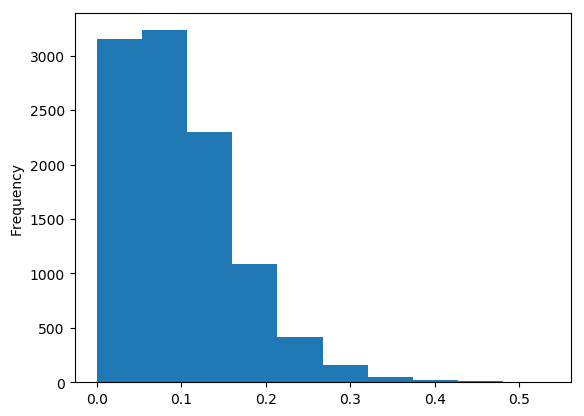

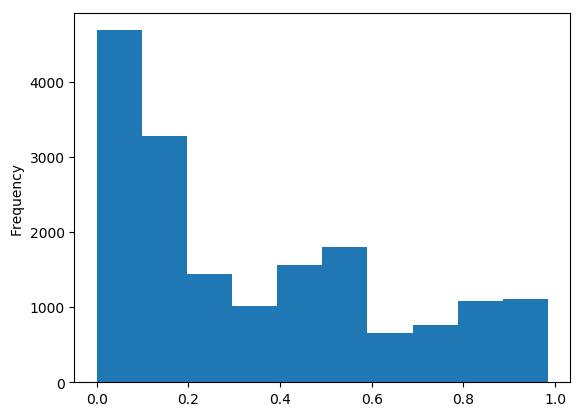

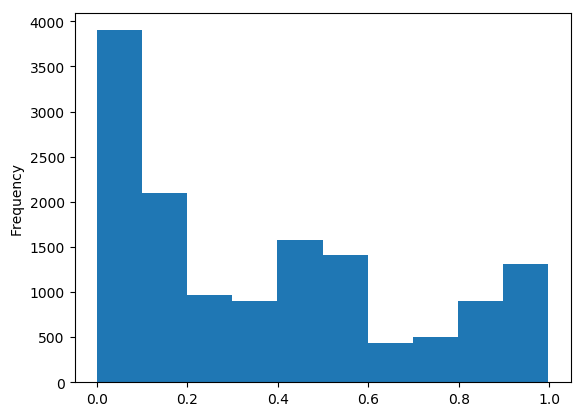

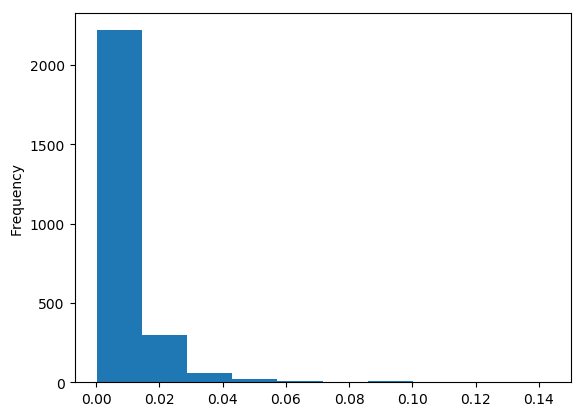

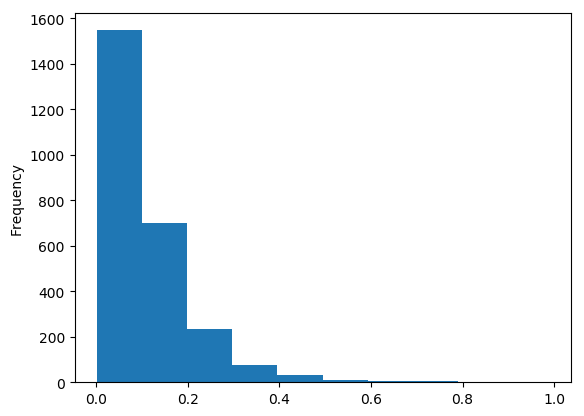

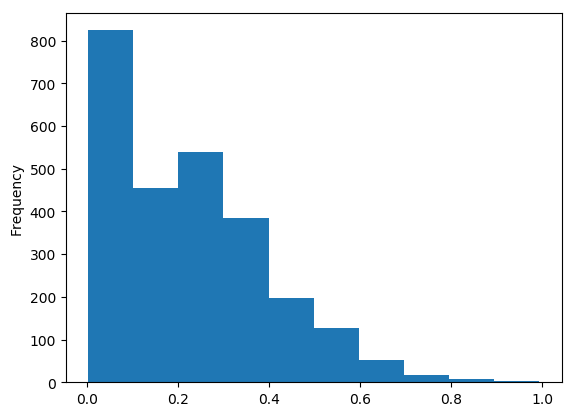

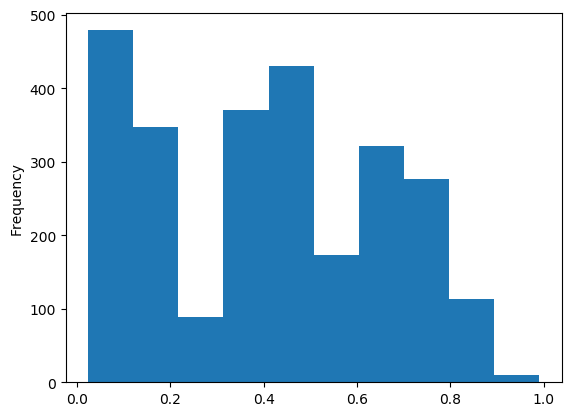

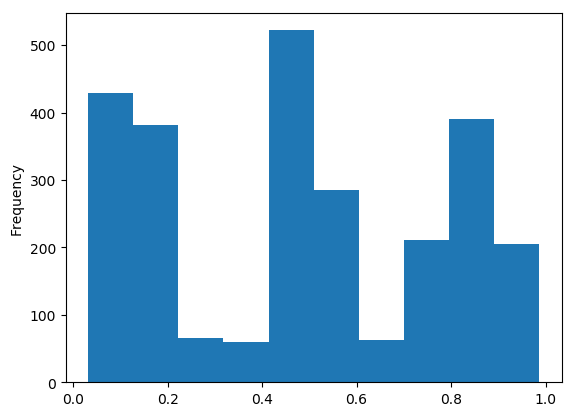

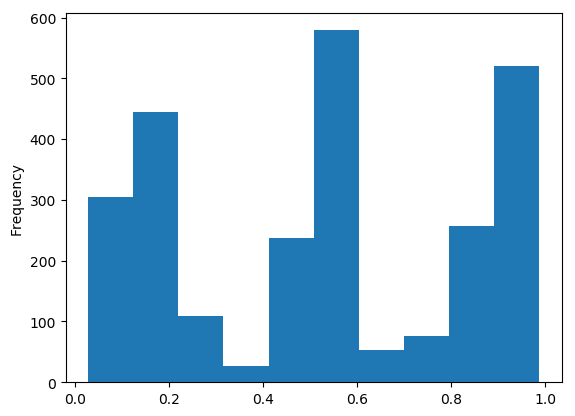

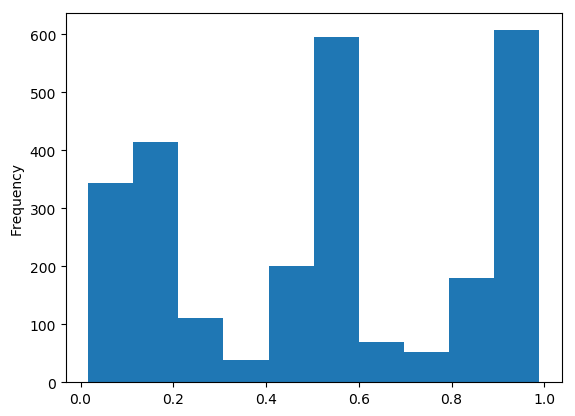

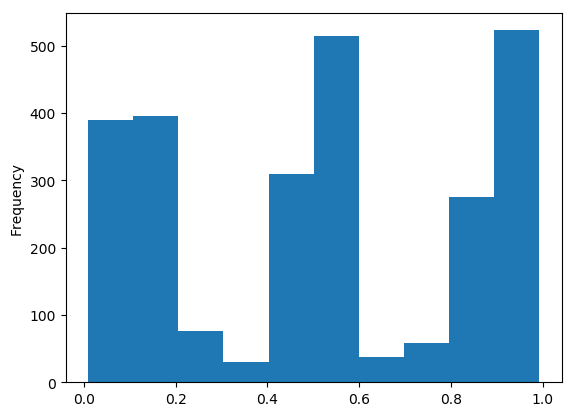

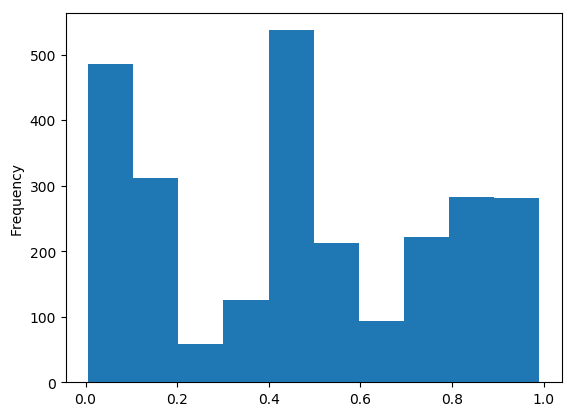

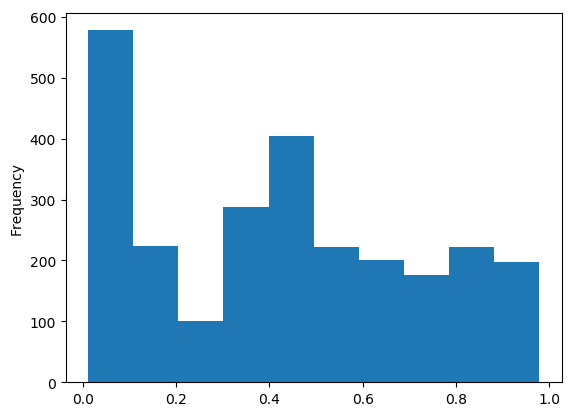

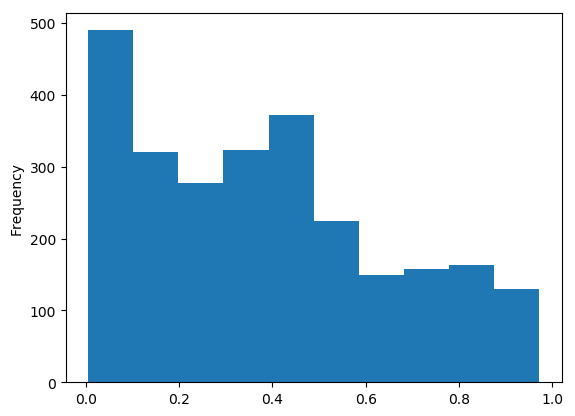

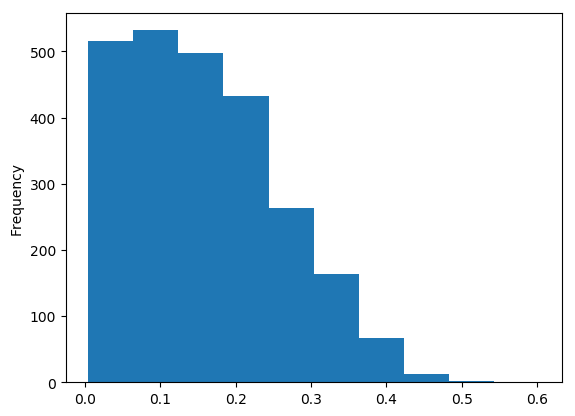

In [7]:
newData.loc[filtmale, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtfemale, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtcity, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtvill, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage1, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage2, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage3, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage4, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage5, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage6, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage7, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage8, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage9, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage10, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage11, "emp_ratio"].plot.hist()
plt.show()
newData.loc[filtage12, "emp_ratio"].plot.hist()
plt.show()


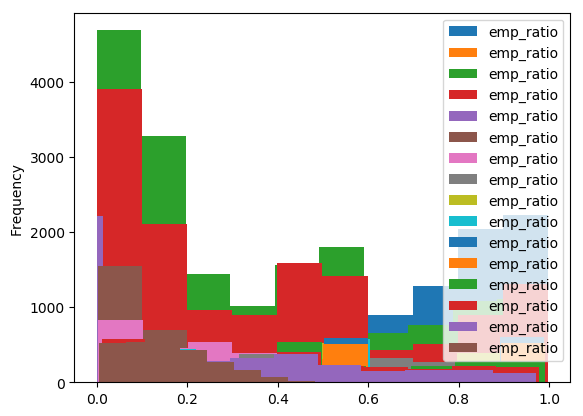

In [8]:
newData.loc[filtmale, "emp_ratio"].plot.hist()
newData.loc[filtfemale, "emp_ratio"].plot.hist()
newData.loc[filtcity, "emp_ratio"].plot.hist()
newData.loc[filtvill, "emp_ratio"].plot.hist()
newData.loc[filtage1, "emp_ratio"].plot.hist()
newData.loc[filtage2, "emp_ratio"].plot.hist()
newData.loc[filtage3, "emp_ratio"].plot.hist()
newData.loc[filtage4, "emp_ratio"].plot.hist()
newData.loc[filtage5, "emp_ratio"].plot.hist()
newData.loc[filtage6, "emp_ratio"].plot.hist()
newData.loc[filtage7, "emp_ratio"].plot.hist()
newData.loc[filtage8, "emp_ratio"].plot.hist()
newData.loc[filtage9, "emp_ratio"].plot.hist()
newData.loc[filtage10, "emp_ratio"].plot.hist()
newData.loc[filtage11, "emp_ratio"].plot.hist()
newData.loc[filtage12, "emp_ratio"].plot.hist()
plt.legend()
plt.show()

In [9]:
filtage = (newData["age_group"] != "15-19 ساله") & (newData["age_group"] != "10-14 ساله") & (newData["age_group"] != "65 ساله و بيشتر")
newData.loc[newData.loc[(filtage & (newData["gender"] == "مرد")),"emp_ratio"].sort_values(ascending=True).index, ["county_name", "age_group", "settlement", "emp_ratio"]]

,county_name,age_group,settlement,emp_ratio
25586,رومشکان,20-24 ساله,شهری,0.0727969
18662,اسلام آبادغرب,20-24 ساله,روستایی,0.113904
25478,پلدختر,20-24 ساله,شهری,0.124173
30140,بافق,60-64 ساله,روستایی,0.12766
13396,رستم,20-24 ساله,شهری,0.133038
...,...,...,...,...
20971,ابوموسي,25-29 ساله,روستایی,0.98995
2077,كنگان,50-54 ساله,روستایی,0.99
2076,كنگان,45-49 ساله,روستایی,0.992049
20970,ابوموسي,20-24 ساله,روستایی,0.992569


In [10]:
newData.loc[newData.loc[(filtage & (newData["gender"] == "زن")),"emp_ratio"].sort_values(ascending=False).index, ["county_name", "age_group", "settlement", "emp_ratio"]]

,county_name,age_group,settlement,emp_ratio
10423,مهرستان,60-64 ساله,شهری,0.534091
10459,سيب و سوران,60-64 ساله,شهری,0.528662
11828,مهرستان,55-59 ساله,روستایی,0.516835
21278,بستك,60-64 ساله,روستایی,0.46724
22865,مراوه تپه,60-64 ساله,شهری,0.465753
...,...,...,...,...
16299,برخوار,50-54 ساله,روستایی,0.00581395
28131,تفرش,60-64 ساله,روستایی,0.00543478
2877,بن,20-24 ساله,روستایی,0.00534759
20476,روانسر,20-24 ساله,روستایی,0.00285714


In [11]:
newData.loc[newData["emp_ratio"].sort_values(ascending=True).index, ["county_name", "age_group", "settlement", "emp_ratio", "gender"]]

,county_name,age_group,settlement,emp_ratio,gender
818,ايلام,10-14 ساله,شهری,0.000297133,زن
21280,خمير,10-14 ساله,روستایی,0.000338868,مرد و زن
24190,طوالش,10-14 ساله,شهری,0.000356888,زن
15787,فلاورجان,10-14 ساله,روستایی,0.000361664,زن
15210,شاهين شهروميمه,10-14 ساله,شهری,0.00043802,زن
...,...,...,...,...,...
20971,ابوموسي,25-29 ساله,روستایی,0.98995,مرد
2077,كنگان,50-54 ساله,روستایی,0.99,مرد
2076,كنگان,45-49 ساله,روستایی,0.992049,مرد
20970,ابوموسي,20-24 ساله,روستایی,0.992569,مرد


In [12]:
newData.loc[(newData["emp_ratio"].sort_values(ascending=False).index), ["county_name", "age_group", "settlement", "emp_ratio", "gender"]]

,county_name,age_group,settlement,emp_ratio,gender
20967,ابوموسي,مرد,روستایی,0.997406,مرد
20970,ابوموسي,20-24 ساله,روستایی,0.992569,مرد
2076,كنگان,45-49 ساله,روستایی,0.992049,مرد
2077,كنگان,50-54 ساله,روستایی,0.99,مرد
20971,ابوموسي,25-29 ساله,روستایی,0.98995,مرد
...,...,...,...,...,...
15210,شاهين شهروميمه,10-14 ساله,شهری,0.00043802,زن
15787,فلاورجان,10-14 ساله,روستایی,0.000361664,زن
24190,طوالش,10-14 ساله,شهری,0.000356888,زن
21280,خمير,10-14 ساله,روستایی,0.000338868,مرد و زن


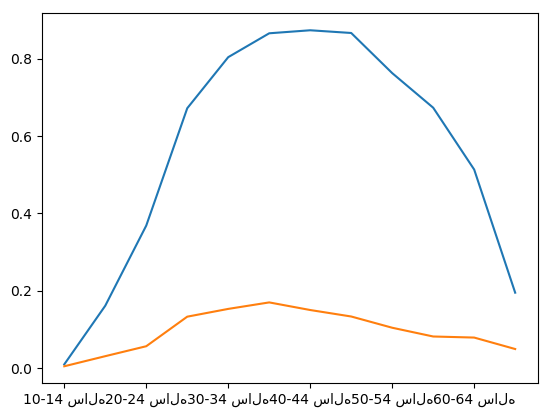

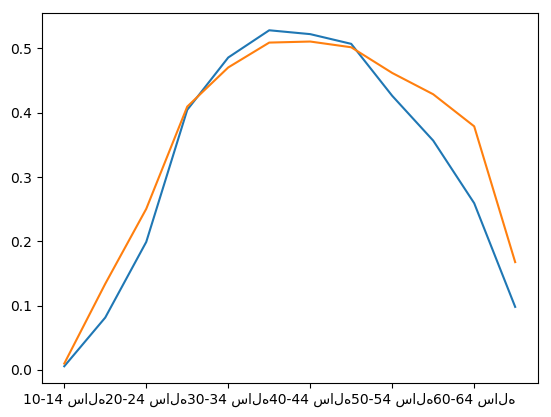

In [13]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
A = ["10-14 ساله", "15-19 ساله", "20-24 ساله", "25-29 ساله", "30-34 ساله", "35-39 ساله", "40-44 ساله", "45-49 ساله", "50-54 ساله", "55-59 ساله", "60-64 ساله", "65 ساله و بيشتر"]
agegrp = newData.groupby("age_group")
for x in A:
    df1.loc[x, "total"] = agegrp.get_group(x).loc[newData["gender"] == "مرد","total"].sum()
    df1.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[newData["gender"] == "مرد","p_active_emp"].sum()
df1["perc-male"] = df1["p_active_emp"] / df1["total"]
df1["perc-male"].plot()
for x in A:
    df2.loc[x, "total"] = agegrp.get_group(x).loc[(newData["gender"] == "زن"),"total"].sum()
    df2.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[ (newData["gender"] == "زن"),"p_active_emp"].sum()
df2["perc-female"] = df2["p_active_emp"] / df2["total"]
df2["perc-female"].plot()
plt.show()
for x in A:
    df3.loc[x, "total"] = agegrp.get_group(x).loc[newData["settlement"] == "شهری","total"].sum()
    df3.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[newData["settlement"] == "شهری","p_active_emp"].sum()
df3["perc-male"] = df3["p_active_emp"] / df3["total"]
df3["perc-male"].plot()
for x in A:
    df4.loc[x, "total"] = agegrp.get_group(x).loc[(newData["settlement"] == "روستایی"),"total"].sum()
    df4.loc[x, "p_active_emp"] = agegrp.get_group(x).loc[ (newData["settlement"] == "روستایی"),"p_active_emp"].sum()
df4["perc-female"] = df4["p_active_emp"] / df4["total"]
df4["perc-female"].plot()
plt.show()

گزارش فاز 2:
5- کمترین برای زنان روستایی 10-14 سال کرمانشاه و بیشترین برای مردان روستایی 35-39 سال کنگان 
6- نمودار مردان و زنان مانند هم است ولی زنان تقریبا زودتر دست از کار میکشند
7- در روستا هم زودتر شروع به کار میکنند هم دیرتر دست از کار میکشند
گزارش فاز 3:
در مردان نیازمند ترین برش جمعیتی 20 تا 24 ساله های شهری رومشکان و در زنان موفق ترین برش جمعیتی 60 تا 64 ساله های شهری مهرستان هستند 